In [1]:
import sys
import pandas as pd
from helpers.plot_helper import PlotHelper
from math import sqrt

### Load JSON dataset by pandas

In [2]:
ratings_grade_inflation_dataframe = pd.read_json('../data/ratings_grade_inflation.json')
ratings_grade_inflation_dict = ratings_grade_inflation_dataframe.to_dict()

### Display dataset

In [3]:
ratings_grade_inflation_dataframe = ratings_grade_inflation_dataframe.transpose()
display(ratings_grade_inflation_dataframe)

,m1,m2,m3,m4
saeed,3.0,1.0,4.0,2.00
abbas,2.0,3.0,3.0,4.00
alireza,4.5,4.0,5.0,4.25


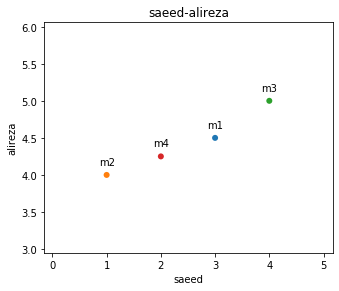

In [4]:
PlotHelper(ratings_grade_inflation_dict,'saeed-alireza').draw_username('saeed','alireza')

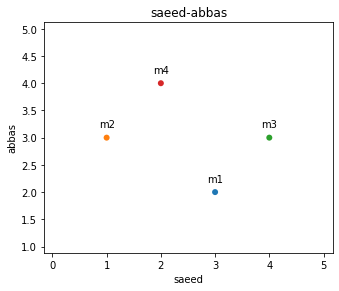

In [5]:
PlotHelper(ratings_grade_inflation_dict,'saeed-abbas').draw_username('saeed','abbas')

### implementation

In [6]:
def get_manhattan_distance(rating1,rating2):
    
    rating1 = dict(filter(lambda x: x[1] != '-', rating1.items()))
    rating2 = dict(filter(lambda x: x[1] != '-', rating2.items()))
    
    distance = 0
    for key in rating1:
        if key in rating2:
            distance += abs(rating1[key] - rating2[key])
    return distance

dt=ratings_grade_inflation_dict

print('saeed-alireza:%f'%get_manhattan_distance(dt['saeed'],dt['alireza']))
print('saeed-abbas:%f'%+get_manhattan_distance(dt['saeed'],dt['abbas']))

saeed-alireza:7.750000
saeed-abbas:6.000000


In [7]:
def get_pearson(rating1, rating2):
    sum_xy = 0
    sum_x = 0
    sum_y = 0
    sum_x2 = 0
    sum_y2 = 0
    n = 0
    for key in rating1:
        if key in rating2:
            n += 1
            x = rating1[key]
            y = rating2[key]
            sum_xy += x * y
            sum_x += x
            sum_y += y
            sum_x2 += pow(x, 2)
            sum_y2 += pow(y, 2)
    denominator = sqrt(sum_x2 - pow(sum_x, 2) / n) * sqrt(sum_y2 - pow(sum_y, 2) / n)
    if denominator == 0:
        return 0
    else:
        return (sum_xy - (sum_x * sum_y) / n) / denominator

dt=ratings_grade_inflation_dict

print('saeed-alireza:%f'%get_pearson(dt['saeed'],dt['alireza']))
print('saeed-abbas:%f'%+get_pearson(dt['saeed'],dt['abbas']))

saeed-alireza:0.982708
saeed-abbas:-0.316228
